# Sprachidentifikation

### 1. Test der Qualität der Module mit Testdatensatz

Erstellen einer Konfusionsmatrix anhand des Testdatensatz

#### Modul langid

In [5]:
# === Formatdefinitionen ===
data_path = r"data\languages4.csv"
title_size = 18
subtitle_size = 14
axis_title_size = 12
axis_title_label_size = 12
legend_fontsize = 12

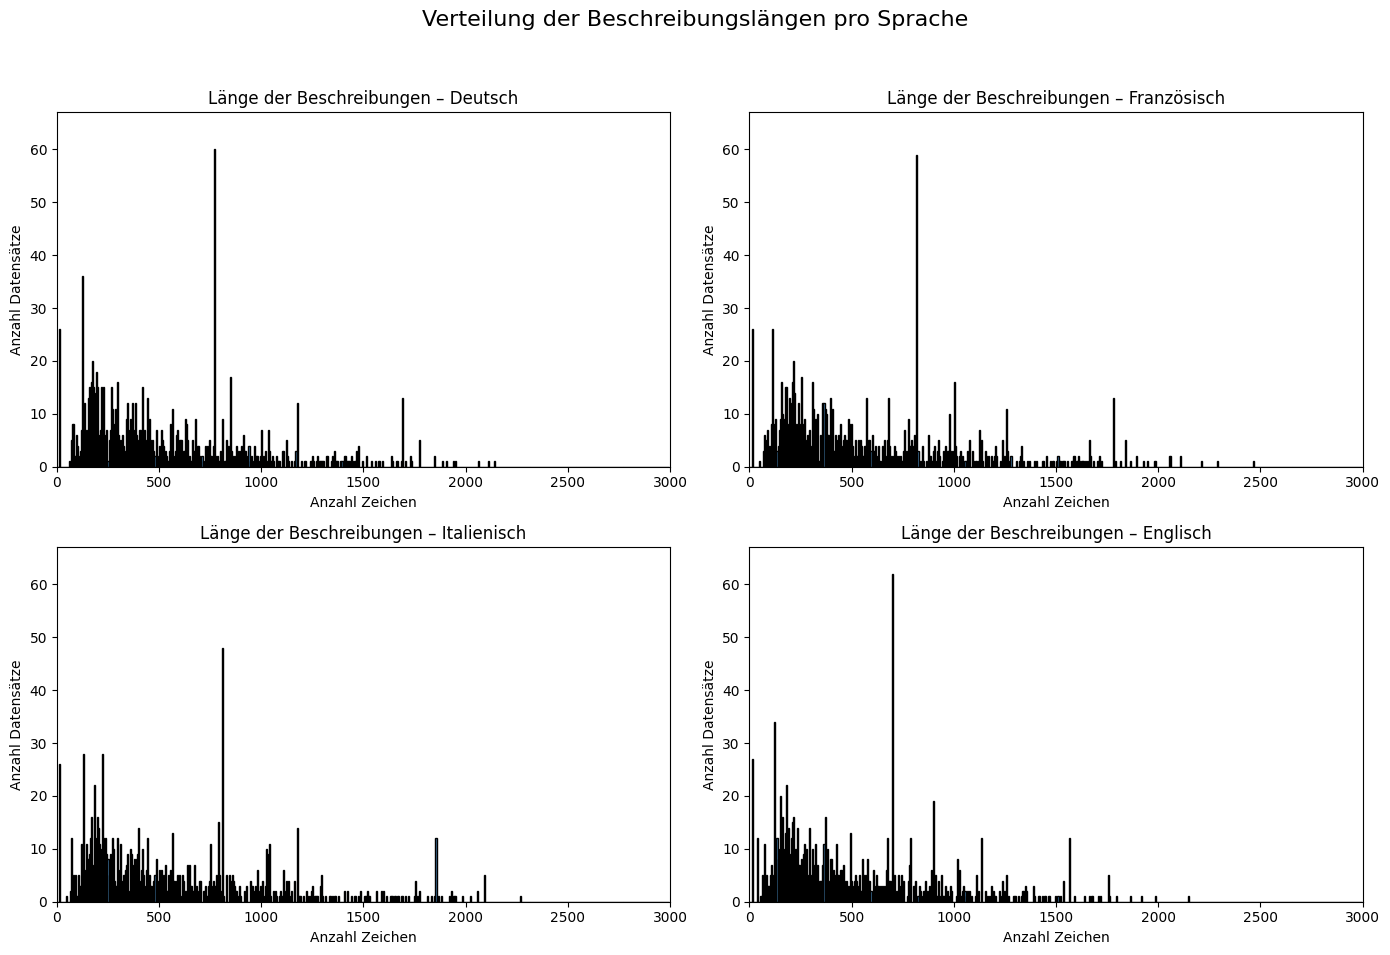

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # für Histogramm-Berechnung

# CSV-Datei einlesen
df = pd.read_csv(data_path, encoding="utf-8")

# Sprachen und zugehörige Spaltennamen definieren
description_columns = {
    'Deutsch': 'dataset_description_DE',
    'Französisch': 'dataset_description_FR',
    'Italienisch': 'dataset_description_IT',
    'Englisch': 'dataset_description_EN'
}

# Beschreibungslängen berechnen
lengths_per_language = {}
for lang_name, col_name in description_columns.items():
    if col_name in df.columns:
        lengths = df[col_name].fillna("").apply(len)
        lengths_per_language[lang_name] = lengths

# Plot-Einstellungen
max_x = 3000
bin_width = 5
bins = list(range(0, max_x + bin_width, bin_width))

# Gemeinsame y-Achsen-Obergrenze berechnen
all_counts = [np.histogram(lengths, bins=bins)[0].max() for lengths in lengths_per_language.values()]
shared_max_y = max(all_counts) + 5

# Subplots vorbereiten
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Histogramme erstellen
for i, (lang_name, lengths) in enumerate(lengths_per_language.items()):
    axes[i].hist(lengths, bins=bins, color='steelblue', edgecolor='black', align='left')
    axes[i].set_title(f"Länge der Beschreibungen – {lang_name}")
    axes[i].set_xlabel("Anzahl Zeichen")
    axes[i].set_ylabel("Anzahl Datensätze")
    axes[i].set_xlim(0, max_x)
    axes[i].set_ylim(0, shared_max_y)

# Gesamttitel und Layout
plt.suptitle("Verteilung der Beschreibungslängen pro Sprache", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


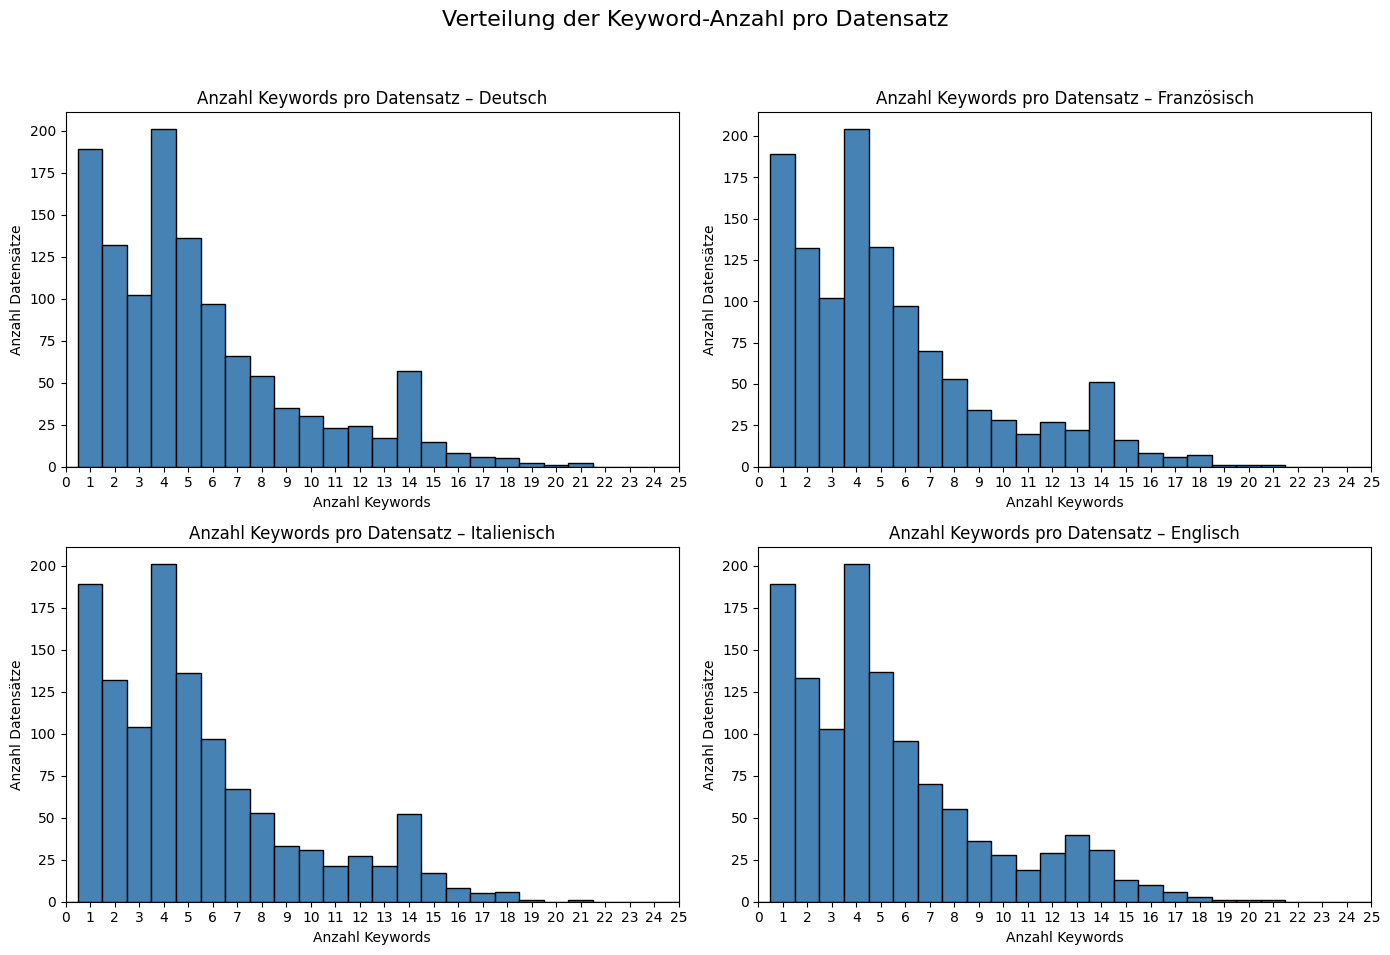

Gesamtauswertung – über alle Sprachen hinweg:
  Gesamtzahl Datensätze:  4816
  Minimum:                1
  Maximum:                127
  Mittelwert:             5.55
  Median:                 4.0
  Standardabweichung:     5.49

Statistische Kennzahlen der Keyword-Anzahl pro Datensatz:

Deutsch:
  Anzahl Datensätze: 1204
  Minimum:           1
  Maximum:           127
  Mittelwert:        5.58
  Median:            4.0
  Standardabweichung:5.53

Französisch:
  Anzahl Datensätze: 1204
  Minimum:           1
  Maximum:           127
  Mittelwert:        5.57
  Median:            4.0
  Standardabweichung:5.51

Italienisch:
  Anzahl Datensätze: 1204
  Minimum:           1
  Maximum:           127
  Mittelwert:        5.55
  Median:            4.0
  Standardabweichung:5.49

Englisch:
  Anzahl Datensätze: 1204
  Minimum:           1
  Maximum:           127
  Mittelwert:        5.50
  Median:            4.0
  Standardabweichung:5.42



In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np

# CSV einlesen
df = pd.read_csv(data_path, encoding="utf-8")

# Spalten mit Keyword-Listen
keyword_columns = {
    'Deutsch': 'dataset_keyword_DE',
    'Französisch': 'dataset_keyword_FR',
    'Italienisch': 'dataset_keyword_IT',
    'Englisch': 'dataset_keyword_EN'
}

# Anzahl Keywords pro Datensatz berechnen
keyword_counts_per_language = {}

for lang_name, col_name in keyword_columns.items():
    if col_name in df.columns:
        counts = []

        for val in df[col_name].fillna("[]"):
            try:
                # Versuche, den String als Liste zu interpretieren
                keywords = literal_eval(val)
                if isinstance(keywords, list):
                    counts.append(len(keywords))
                else:
                    counts.append(0)
            except Exception:
                counts.append(0)  # falls z. B. val kein gültiger Ausdruck ist

        keyword_counts_per_language[lang_name] = counts

# Plot vorbereiten
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

bin_width = 1  # hier Breite der Bins festlegen

for i, (lang_name, counts) in enumerate(keyword_counts_per_language.items()):
    max_display = min(25, max(counts))
    bins = list(range(0, max_display + bin_width + 1, bin_width))

    axes[i].hist(counts, bins=bins, color='steelblue', edgecolor='black', align='left')
    axes[i].set_title(f"Anzahl Keywords pro Datensatz – {lang_name}")
    axes[i].set_xlabel("Anzahl Keywords")
    axes[i].set_ylabel("Anzahl Datensätze")
    axes[i].set_xticks(range(0, max_display + 1, bin_width))
    axes[i].set_xlim(0, max_display)


plt.suptitle("Verteilung der Keyword-Anzahl pro Datensatz", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Statistische Kennzahlen pro Sprache ausgeben
# Alle Keyword-Anzahlen über alle Sprachen hinweg kombinieren
all_counts = []

for counts in keyword_counts_per_language.values():
    all_counts.extend(counts)

all_counts_array = np.array(all_counts)

# Statistiken berechnen und ausgeben
print("Gesamtauswertung – über alle Sprachen hinweg:")
print(f"  Gesamtzahl Datensätze:  {len(all_counts_array)}")
print(f"  Minimum:                {np.min(all_counts_array)}")
print(f"  Maximum:                {np.max(all_counts_array)}")
print(f"  Mittelwert:             {np.mean(all_counts_array):.2f}")
print(f"  Median:                 {np.median(all_counts_array)}")
print(f"  Standardabweichung:     {np.std(all_counts_array):.2f}")
print()

print("Statistische Kennzahlen der Keyword-Anzahl pro Datensatz:\n")
for lang_name, counts in keyword_counts_per_language.items():
    array = np.array(counts)
    print(f"{lang_name}:")
    print(f"  Anzahl Datensätze: {len(array)}")
    print(f"  Minimum:           {np.min(array)}")
    print(f"  Maximum:           {np.max(array)}")
    print(f"  Mittelwert:        {np.mean(array):.2f}")
    print(f"  Median:            {np.median(array)}")
    print(f"  Standardabweichung:{np.std(array):.2f}")
    print()



In [37]:
from collections import Counter

# Alle Keyword-Anzahlen über alle Sprachen hinweg kombinieren
all_counts = []

for counts in keyword_counts_per_language.values():
    all_counts.extend(counts)

# Zählen, wie oft jede Anzahl vorkommt
count_distribution = Counter(all_counts)
total = len(all_counts)

# Top 5 häufigste Keyword-Anzahlen
top_5 = count_distribution.most_common(5)

# Ausgabe
print("Top 5 häufigste Keyword-Anzahlen über alle Datensätze hinweg:\n")
for num_keywords, count in top_5:
    percent = (count / total) * 100
    print(f"{percent:5.1f}% ({count} von {total}) der Datensätze haben {num_keywords} Keywords")

# Summe aller Top-5-Einträge
top_5_total = sum([count for _, count in top_5])
top_5_percent = (top_5_total / total) * 100

print(f"\nZusammen machen diese Top 5 {top_5_percent:.1f}% ({top_5_total} von {total}) aller Datensätze aus.")


Top 5 häufigste Keyword-Anzahlen über alle Datensätze hinweg:

 16.8% (807 von 4816) der Datensätze haben 4 Keywords
 15.7% (756 von 4816) der Datensätze haben 1 Keywords
 11.3% (542 von 4816) der Datensätze haben 5 Keywords
 11.0% (529 von 4816) der Datensätze haben 2 Keywords
  8.5% (411 von 4816) der Datensätze haben 3 Keywords

Zusammen machen diese Top 5 63.2% (3045 von 4816) aller Datensätze aus.


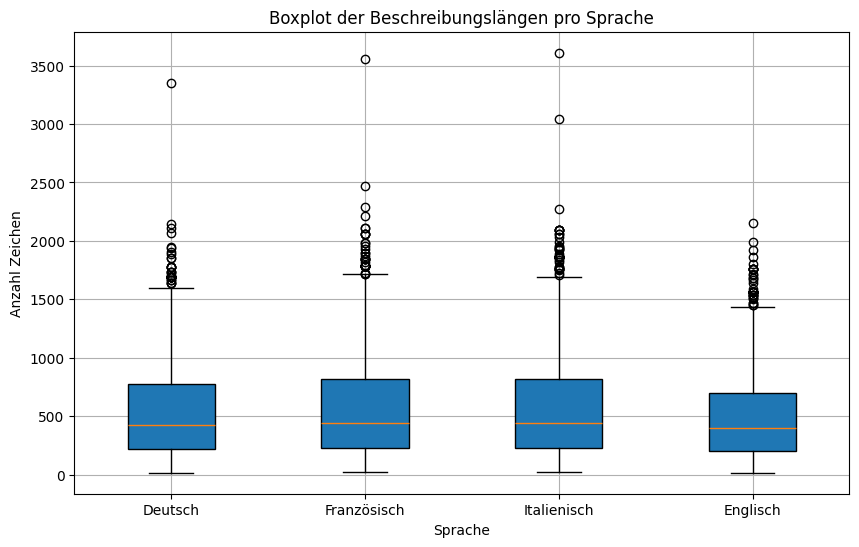

Statistische Übersicht der Beschreibungslängen pro Sprache:

Deutsch:
  Minimum:        16
  25%-Quantil:    216
  Median (50%):   421
  75%-Quantil:    772
  Maximum:        3350
  Mittelwert:     546
  Standardabweichung: 419

Französisch:
  Minimum:        19
  25%-Quantil:    224
  Median (50%):   445
  75%-Quantil:    820
  Maximum:        3559
  Mittelwert:     588
  Standardabweichung: 459

Italienisch:
  Minimum:        19
  25%-Quantil:    227
  Median (50%):   442
  75%-Quantil:    814
  Maximum:        3610
  Mittelwert:     579
  Standardabweichung: 460

Englisch:
  Minimum:        17
  25%-Quantil:    205
  Median (50%):   398
  75%-Quantil:    700
  Maximum:        2150
  Mittelwert:     508
  Standardabweichung: 387



In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV einlesen
df = pd.read_csv(data_path, encoding="utf-8")

# Liste der Sprachen und zugehöriger Spaltennamen
description_columns = {
    'Deutsch': 'dataset_description_DE',
    'Französisch': 'dataset_description_FR',
    'Italienisch': 'dataset_description_IT',
    'Englisch': 'dataset_description_EN'
}

# Beschreibungslängen berechnen
lengths_per_language = {}
for lang_name, col_name in description_columns.items():
    if col_name in df.columns:
        lengths = df[col_name].fillna("").apply(len)
        lengths_per_language[lang_name] = lengths

# Boxplot erstellen
plt.figure(figsize=(10, 6))
plt.boxplot([lengths for lengths in lengths_per_language.values()], labels=lengths_per_language.keys(), patch_artist=True)
plt.title("Boxplot der Beschreibungslängen pro Sprache")
plt.xlabel("Sprache")
plt.ylabel("Anzahl Zeichen")
plt.grid(True)
plt.show()

# Statistische Kennwerte ausgeben
print("Statistische Übersicht der Beschreibungslängen pro Sprache:\n")
for lang_name, lengths in lengths_per_language.items():
    stats = lengths.describe()
    print(f"{lang_name}:")
    print(f"  Minimum:        {int(stats['min'])}")
    print(f"  25%-Quantil:    {int(stats['25%'])}")
    print(f"  Median (50%):   {int(stats['50%'])}")
    print(f"  75%-Quantil:    {int(stats['75%'])}")
    print(f"  Maximum:        {int(stats['max'])}")
    print(f"  Mittelwert:     {int(stats['mean'])}")
    print(f"  Standardabweichung: {int(stats['std'])}")
    print()


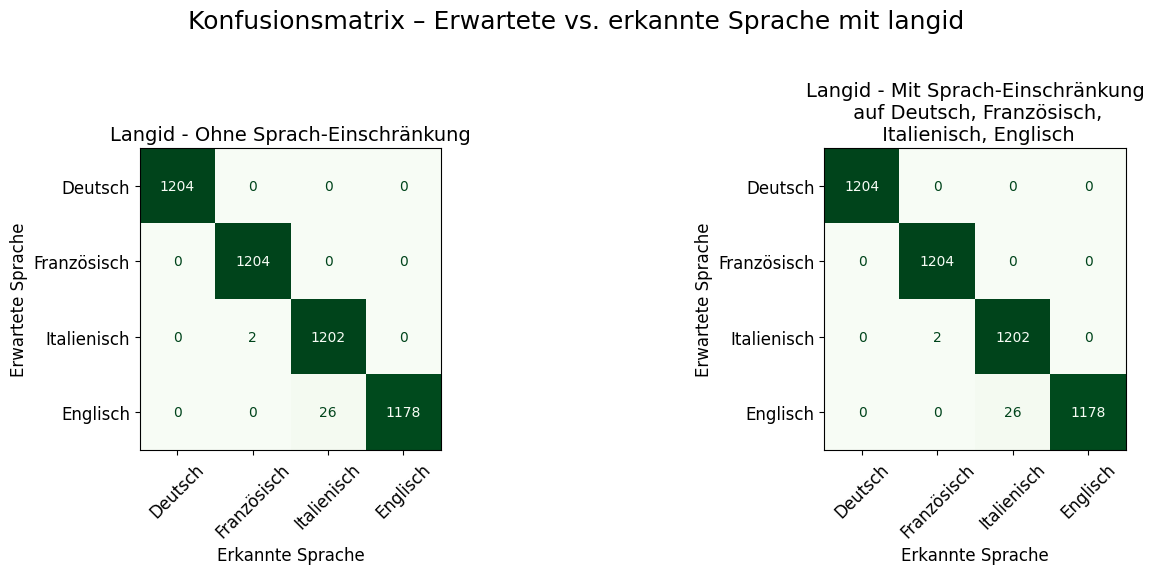

Gesamtgenauigkeit (mit Sprach-Einschränkung):     99.42 %
Gesamtgenauigkeit (ohne Sprach-Einschränkung):    99.42 %


In [5]:
import pandas as pd
import langid
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sprachliste für die rechte Grafik (mit Constraint)
langid.set_languages(['en', 'fr', 'de', 'it'])

# Sprache erkennen – Variante mit Constraint
def detect_language_constrained(text):
    language_dict = {'en': 'Englisch', 'fr': 'Französisch', 'de': 'Deutsch', 'it': 'Italienisch'}
    try:
        lang, _ = langid.classify(str(text))
        return language_dict.get(lang, 'nicht_erkannt')
    except:
        return 'nicht_erkannt'

# Sprache erkennen – Variante ohne Constraint
def detect_language_unconstrained(text):
    language_dict = {'en': 'Englisch', 'fr': 'Französisch', 'de': 'Deutsch', 'it': 'Italienisch'}
    try:
        langid.set_languages(None)  # alle Sprachen zulassen
        lang, _ = langid.classify(str(text))
        return language_dict.get(lang, lang)  # zeige Original-Code, wenn unbekannt
    except:
        return 'nicht_erkannt'

# CSV einlesen
df = pd.read_csv(data_path, encoding="utf-8")

# Spalten definieren
base_columns = ['dataset_description']
languages = {'DE': 'Deutsch', 'FR': 'Französisch', 'IT': 'Italienisch', 'EN': 'Englisch'}

column_lang_mapping = {
    f"{base}_{lang}": expected_lang
    for base in base_columns
    for lang, expected_lang in languages.items()
    if f"{base}_{lang}" in df.columns
}

# Spracherkennung mit und ohne Constraint
for col, expected_lang in column_lang_mapping.items():
    df[f"{col}_constrained"] = df[col].apply(detect_language_constrained)
    df[f"{col}_unconstrained"] = df[col].apply(detect_language_unconstrained)

# Werte für beide Matrizen sammeln
detected_constrained = []
detected_unconstrained = []
expected = []

for col, lang in column_lang_mapping.items():
    detected_constrained += df[f"{col}_constrained"].tolist()
    detected_unconstrained += df[f"{col}_unconstrained"].tolist()
    expected += [lang] * len(df)

# Nur gültige Einträge filtern
def filter_valid(exp_list, det_list):
    return zip(*[(e, d) for e, d in zip(exp_list, det_list) if d != 'nicht_erkannt'])

expected_filtered_c, detected_filtered_c = filter_valid(expected, detected_constrained)
expected_filtered_u, detected_filtered_u = filter_valid(expected, detected_unconstrained)

# Labels (Deutsch)
labels = ['Deutsch', 'Französisch', 'Italienisch', 'Englisch']

# Konfusionsmatrizen
cm_c = confusion_matrix(expected_filtered_c, detected_filtered_c, labels=labels)
cm_u = confusion_matrix(expected_filtered_u, detected_filtered_u, labels=labels)

# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_u, display_labels=labels)
disp1.plot(ax=axes[0], cmap='Greens', xticks_rotation=45, colorbar=False)
axes[0].set_title("Langid - Ohne Sprach-Einschränkung", fontsize=subtitle_size)
axes[0].set_xlabel("Erkannte Sprache", fontsize=axis_title_size)
axes[0].set_ylabel("Erwartete Sprache", fontsize=axis_title_size)
axes[0].tick_params(axis='both', labelsize=axis_title_label_size)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_c, display_labels=labels)
disp2.plot(ax=axes[1], cmap='Greens', xticks_rotation=45, colorbar=False)
axes[1].set_title("Langid - Mit Sprach-Einschränkung\n auf Deutsch, Französisch,\n Italienisch, Englisch", fontsize=subtitle_size)
axes[1].set_xlabel("Erkannte Sprache", fontsize=axis_title_size)
axes[1].set_ylabel("Erwartete Sprache", fontsize=axis_title_size)
axes[1].tick_params(axis='both', labelsize=axis_title_label_size)

plt.suptitle("Konfusionsmatrix – Erwartete vs. erkannte Sprache mit langid", fontsize=title_size)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Genauigkeit berechnen
gesamt_genauigkeit_constrained = (sum(e == d for e, d in zip(expected, detected_constrained)) / len(expected)) * 100
gesamt_genauigkeit_unconstrained = (sum(e == d for e, d in zip(expected, detected_unconstrained)) / len(expected)) * 100

print(f"Gesamtgenauigkeit (mit Sprach-Einschränkung):     {gesamt_genauigkeit_constrained:.2f} %")
print(f"Gesamtgenauigkeit (ohne Sprach-Einschränkung):    {gesamt_genauigkeit_unconstrained:.2f} %")


#### Modul langdetect

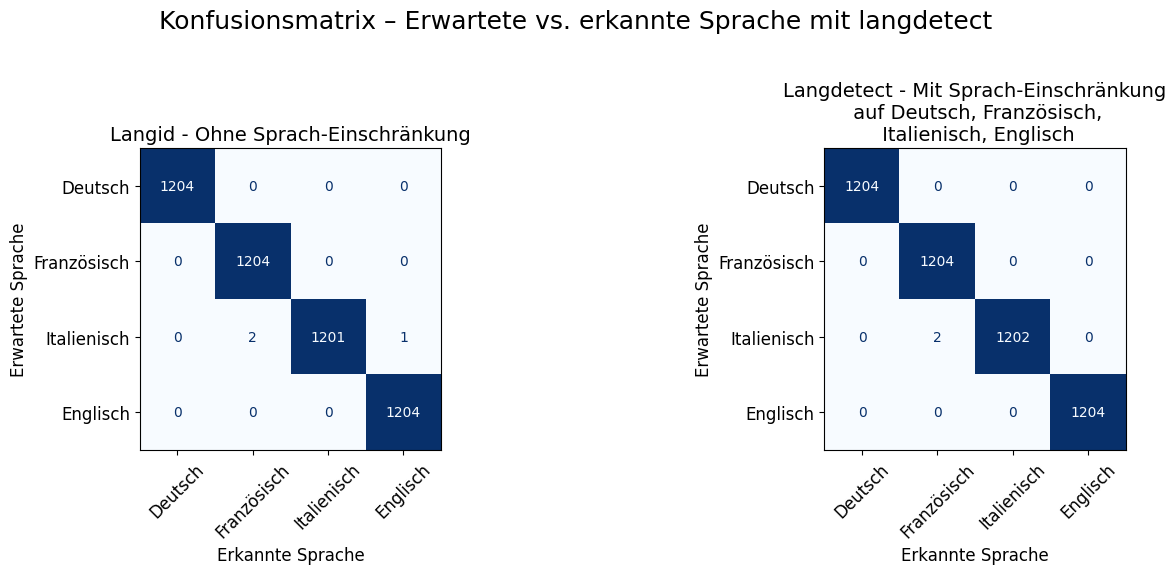

Gesamtgenauigkeit (mit Sprach-Einschränkung):     99.96 %
Gesamtgenauigkeit (ohne Sprach-Einschränkung):    99.94 %


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect_langs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# CSV einlesen
df = pd.read_csv(data_path, encoding="utf-8")

# Basisspalten und erwartete Sprachen
base_columns = ['dataset_description']
languages = {'DE': 'Deutsch', 'FR': 'Französisch', 'IT': 'Italienisch', 'EN': 'Englisch'}

column_lang_mapping = {
    f"{base}_{lang}": expected_lang
    for base in base_columns
    for lang, expected_lang in languages.items()
    if f"{base}_{lang}" in df.columns
}

# Mapping ISO → Deutsch
iso_to_de = {'en': 'Englisch', 'fr': 'Französisch', 'de': 'Deutsch', 'it': 'Italienisch'}

# Sprache erkennen mit Einschränkung – durchsucht alle Vorschläge
def detect_preferred_language(text, language_prefixes):
    try:
        langs = detect_langs(str(text))
        for lang in langs:
            if lang.lang in language_prefixes:
                return iso_to_de.get(lang.lang, 'nicht_erkannt')
        return 'nicht_erkannt'
    except:
        return 'nicht_erkannt'

# Sprache erkennen ohne Einschränkung (nimmt erste Sprache)
def detect_unconstrained(text):
    try:
        langs = detect_langs(str(text))
        return iso_to_de.get(langs[0].lang, langs[0].lang)
    except:
        return 'nicht_erkannt'

# Spracherkennung anwenden
for col, expected_lang in column_lang_mapping.items():
    df[f"{col}_constrained"] = df[col].apply(lambda x: detect_preferred_language(x, ['de', 'fr', 'it', 'en']))
    df[f"{col}_unconstrained"] = df[col].apply(detect_unconstrained)

# Vergleichslisten aufbauen
expected = []
detected_constrained = []
detected_unconstrained = []

for col, expected_lang in column_lang_mapping.items():
    expected += [expected_lang] * len(df)
    detected_constrained += df[f"{col}_constrained"].tolist()
    detected_unconstrained += df[f"{col}_unconstrained"].tolist()

# Nur gültige Einträge behalten
def filter_valid(e, d):
    return zip(*[(ex, de) for ex, de in zip(e, d) if de != 'nicht_erkannt'])

expected_c, detected_c = filter_valid(expected, detected_constrained)
expected_u, detected_u = filter_valid(expected, detected_unconstrained)

# Labels
labels = ['Deutsch', 'Französisch', 'Italienisch', 'Englisch']

# Konfusionsmatrizen
cm_c = confusion_matrix(expected_c, detected_c, labels=labels)
cm_u = confusion_matrix(expected_u, detected_u, labels=labels)

# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ohne Einschränkung
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_u, display_labels=labels)
disp1.plot(ax=axes[0], cmap='Blues', xticks_rotation=45, colorbar=False)
axes[0].set_title("Langid - Ohne Sprach-Einschränkung", fontsize=subtitle_size)
axes[0].set_xlabel("Erkannte Sprache", fontsize=axis_title_size)
axes[0].set_ylabel("Erwartete Sprache", fontsize=axis_title_size)
axes[0].tick_params(axis='both', labelsize=axis_title_label_size)

# Mit Einschränkung
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_c, display_labels=labels)
disp2.plot(ax=axes[1], cmap='Blues', xticks_rotation=45, colorbar=False)
axes[1].set_title("Langdetect - Mit Sprach-Einschränkung\n auf Deutsch, Französisch,\n Italienisch, Englisch", fontsize=subtitle_size)
axes[1].set_xlabel("Erkannte Sprache", fontsize=axis_title_size)
axes[1].set_ylabel("Erwartete Sprache", fontsize=axis_title_size)
axes[1].tick_params(axis='both', labelsize=axis_title_label_size)

# Gesamttitel
plt.suptitle("Konfusionsmatrix – Erwartete vs. erkannte Sprache mit langdetect", fontsize=title_size)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Genauigkeit berechnen
gesamt_genauigkeit_constrained = (sum(e == d for e, d in zip(expected, detected_constrained)) / len(expected)) * 100
gesamt_genauigkeit_unconstrained = (sum(e == d for e, d in zip(expected, detected_unconstrained)) / len(expected)) * 100

# Ausgabe
print(f"Gesamtgenauigkeit (mit Sprach-Einschränkung):     {gesamt_genauigkeit_constrained:.2f} %")
print(f"Gesamtgenauigkeit (ohne Sprach-Einschränkung):    {gesamt_genauigkeit_unconstrained:.2f} %")


### Anzahl Nötiger Zeichen feststellen

In [43]:
def run_language_detection_analysis(
    df,
    detect_language_func,
    base_columns=['dataset_description'],
    languages={'DE': 'german', 'FR': 'french', 'IT': 'italian', 'EN': 'english'},
    max_chars=100,
    min_chars=1,
    char_step=1
):
    """
    Führt eine Spracherkennungsanalyse für verschiedene Zeichenlängen durch.

    Parameter:
        df (pd.DataFrame): Eingabedaten.
        detect_language_func (function): Sprachdetektionsfunktion, gibt 'german', 'french' etc. zurück.
        base_columns (list): Liste von Basis-Spaltennamen (z. B. ['dataset_description']).
        languages (dict): Mapping von Sprachkürzeln zu erwarteten Sprachbezeichnungen.
        max_chars (int): Maximale Anzahl Zeichen für Test.
        min_chars (int): Minimale Anzahl Zeichen für Test.
        char_step (int): Schrittweite.

    Rückgabe:
        dict[str, pd.DataFrame]: Ergebnisse als DataFrames pro Sprache.
    """
    from tqdm import tqdm

    # Spalten aufbauen
    column_lang_mapping = {
        f"{base}_{lang}": expected_lang
        for base in base_columns
        for lang, expected_lang in languages.items()
        if f"{base}_{lang}" in df.columns
    }

    # Ergebnis-Container
    per_lang_results = {lang.capitalize(): [] for lang in languages.values()}
    char_range = range(max_chars, min_chars - 1, -char_step)

    # Hauptschleife
    for char_count in tqdm(char_range, desc="Zeichenlängen", unit="Zeichen"):
        for col, expected_lang in tqdm(column_lang_mapping.items(), desc=f"Spalten ({char_count} Zeichen)", leave=False):
            def cut_and_detect(text):
                if pd.isna(text) or not isinstance(text, str):
                    return 'not_found'
                short_text = text[:char_count]
                return detect_language_func(short_text)

            detected = df[col].apply(cut_and_detect)
            correct = (detected == expected_lang).sum()
            total = detected.count()
            accuracy = (correct / total) * 100 if total > 0 else 0
            per_lang_results[expected_lang.capitalize()].append((char_count, accuracy))

    # Rückgabe als DataFrames
    result_dfs = {
        lang: pd.DataFrame(results, columns=['Zeichenanzahl', 'Genauigkeit'])
        for lang, results in per_lang_results.items()
    }
    return result_dfs


In [44]:
import langid

lang_map = {'en': 'english', 'fr': 'french', 'de': 'german', 'it': 'italian'}

def make_langid_detector(constrained=True, allowed_langs=['en', 'fr', 'de', 'it']):
    if constrained:
        langid.set_languages(allowed_langs)
    else:
        langid.set_languages(None)

    def detect_language(text):
        try:
            lang, _ = langid.classify(text)
            return lang_map.get(lang, 'not_found')
        except:
            return 'not_found'

    return detect_language


In [45]:
from langdetect import detect_langs

iso_to_de = {
    'en': 'english', 'fr': 'french', 'de': 'german', 'it': 'italian'
}

def make_langdetect_detector(constrained=True, allowed_langs=['en', 'fr', 'de', 'it']):
    def detect_language(text):
        try:
            langs = detect_langs(str(text))
            if constrained:
                for lang in langs:
                    if lang.lang in allowed_langs:
                        return iso_to_de.get(lang.lang, 'not_found')
                return 'not_found'
            else:
                return iso_to_de.get(langs[0].lang, langs[0].lang)
        except:
            return 'not_found'

    return detect_language


In [10]:
# Detector factory mapping
detector_factories = {
    'langid': make_langid_detector,
    'langdetect': make_langdetect_detector
}

# Configurations: (model_name, constrained_flag)
configs = [
    ('langid', True),
    ('langid', False),
    ('langdetect', True),
    ('langdetect', False)
]

# Ergebnisse speichern
all_results = {}

# Loop über alle Kombinationen
for model_name, constrained in configs:
    detector_func = detector_factories[model_name](constrained=constrained)
    key = f"{model_name}_{'constrained' if constrained else 'unconstrained'}"
    all_results[key] = run_language_detection_analysis(df, detector_func)


Zeichenlängen:   0%|          | 0/100 [00:00<?, ?Zeichen/s]

Zeichenlängen: 100%|██████████| 100/100 [7:49:44<00:00, 281.85s/Zeichen]   


Grafik für langid und langdetect aufgeschlüsselt nach Sprache

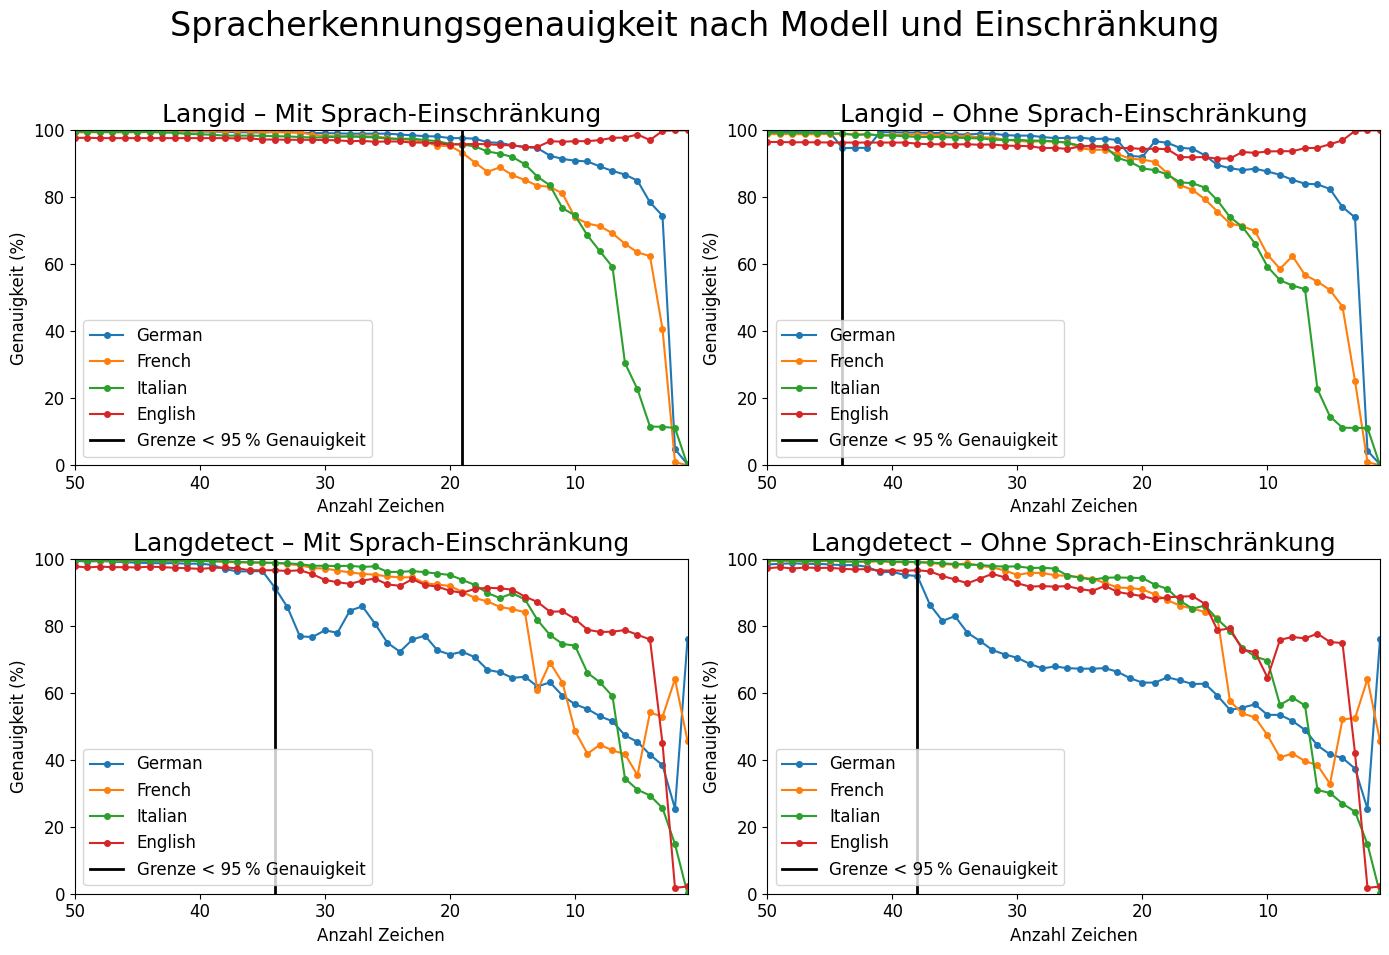

✔️ Zeichenanzahl, bei der die Genauigkeit erstmals unter 95 % fällt:

Langid – Mit Sprach-Einschränkung             ⟶ ab 19.0 Zeichen < 95 %
Langid – Ohne Sprach-Einschränkung            ⟶ ab 44.0 Zeichen < 95 %
Langdetect – Mit Sprach-Einschränkung         ⟶ ab 34.0 Zeichen < 95 %
Langdetect – Ohne Sprach-Einschränkung        ⟶ ab 38.0 Zeichen < 95 %


In [18]:
import matplotlib.pyplot as plt

title_size = 24
subtitle_size = 18



fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Spracherkennungsgenauigkeit nach Modell und Einschränkung", fontsize=title_size)

# Reihenfolge der Kombinationen
sorted_keys = [
    'langid_constrained',
    'langid_unconstrained',
    'langdetect_constrained',
    'langdetect_unconstrained'
]

# Deutsche Titel
plot_titles = {
    'langid_constrained': 'Langid – Mit Sprach-Einschränkung',
    'langid_unconstrained': 'Langid – Ohne Sprach-Einschränkung',
    'langdetect_constrained': 'Langdetect – Mit Sprach-Einschränkung',
    'langdetect_unconstrained': 'Langdetect – Ohne Sprach-Einschränkung'
}

max_chars = 50
min_chars = 1

# Zeichnen
for ax, key in zip(axes.flat, sorted_keys):
    per_lang_results = all_results[key]
    all_char_accuracies = {}

    # Linien für jede Sprache zeichnen und Daten sammeln
    for lang, df_lang in per_lang_results.items():
        df_lang_sorted = df_lang.sort_values(by='Zeichenanzahl', ascending=False)
        ax.plot(
            df_lang_sorted['Zeichenanzahl'],
            df_lang_sorted['Genauigkeit'],
            marker='o',
             markersize=4,
            label=lang
        )
        # Merke dir Genauigkeit pro Zeichenanzahl
        for _, row in df_lang_sorted.iterrows():
            z = row['Zeichenanzahl']
            acc = row['Genauigkeit']
            all_char_accuracies.setdefault(z, []).append(acc)

    # Finde erste Zeichenanzahl, bei der mindestens eine Sprache < 95% ist
    for z in sorted(all_char_accuracies.keys(), reverse=True):
        if any(a < 95 for a in all_char_accuracies[z]):
            # Nur Linie mit Eintrag in der Legende, keine Beschriftung im Plot
            ax.plot([z, z], [0, 100], color='black', linestyle='-', linewidth=2, label='Grenze < 95 % Genauigkeit')
            break






    ax.set_title(plot_titles[key], fontsize=subtitle_size)
    ax.set_xlabel('Anzahl Zeichen', fontsize=axis_title_size)
    ax.set_ylabel('Genauigkeit (%)', fontsize=axis_title_size)
    ax.set_ylim(0, 100)
    ax.set_xlim(max_chars, min_chars)
    ax.grid(False)
    ax.tick_params(labelsize=axis_title_label_size)
    ax.legend(loc='lower left', fontsize=legend_fontsize)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("✔️ Zeichenanzahl, bei der die Genauigkeit erstmals unter 95 % fällt:\n")

for key in sorted_keys:
    per_lang_results = all_results[key]
    all_char_accuracies = {}

    # Genauigkeiten pro Zeichenanzahl sammeln
    for df_lang in per_lang_results.values():
        for _, row in df_lang.iterrows():
            z = row['Zeichenanzahl']
            acc = row['Genauigkeit']
            all_char_accuracies.setdefault(z, []).append(acc)

    # Nach absteigender Zeichenanzahl prüfen
    threshold_char = None
    for z in sorted(all_char_accuracies.keys(), reverse=True):
        if any(a < 95 for a in all_char_accuracies[z]):
            threshold_char = z
            break

    if threshold_char is not None:
        print(f"{plot_titles[key]:<45} ⟶ ab {threshold_char} Zeichen < 95 %")
    else:
        print(f"{plot_titles[key]:<45} ⟶ immer ≥ 95 %")



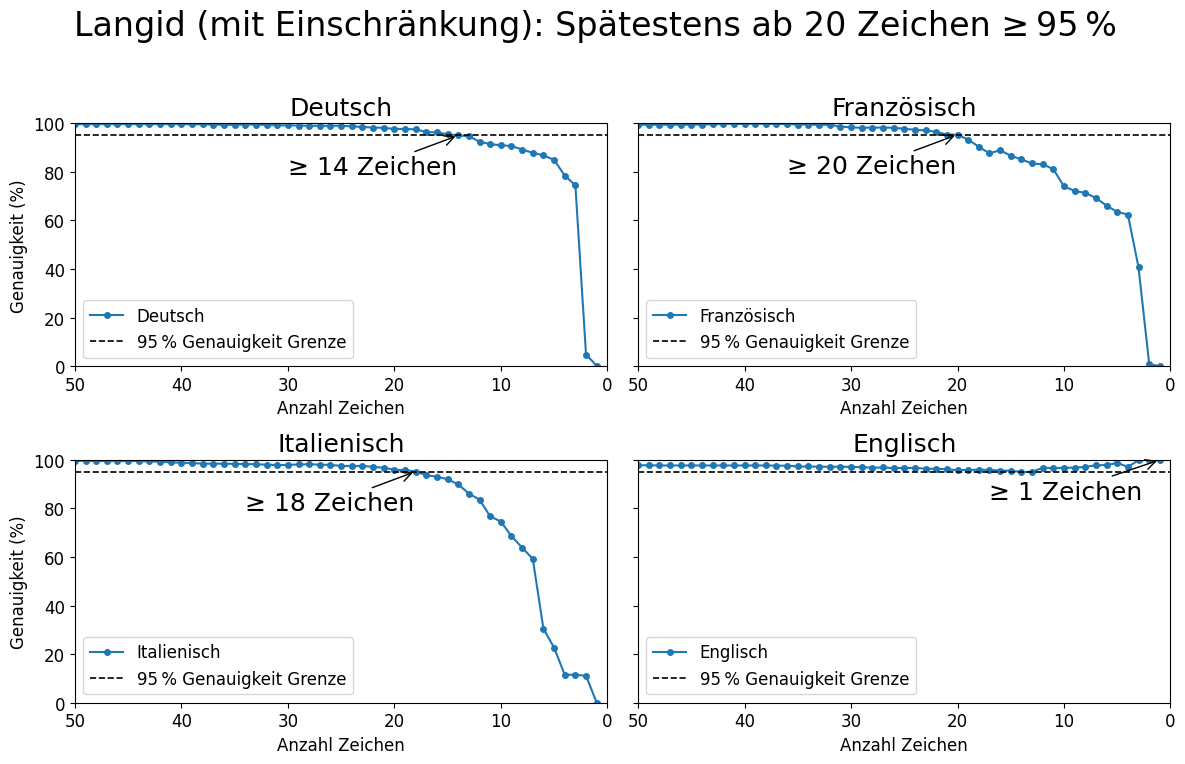

In [19]:
import matplotlib.pyplot as plt

subtitle_size = 18
title_size =24

# === Einstellungen ===
reliability_threshold = 95.0
display_min_chars = 0
display_max_chars = 50

    # Titel & Achsen
lang_labels = {
        "German": "Deutsch",
        "French": "Französisch",
        "Italian": "Italienisch",
        "English": "Englisch"
    }

# === Datenquelle: langid_constrained ===
per_lang_results = all_results["langid_constrained"]

# === Layout vorbereiten ===
n_langs = len(per_lang_results)
ncols = 2
nrows = (n_langs + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows), sharey=True)
axes = axes.flatten()

# Statistikspeicher
reliable_char_stats = []

# === Plot pro Sprache ===
for i, (lang, df_lang) in enumerate(per_lang_results.items()):
    ax = axes[i]

    # Sortieren und Filtern
    df_sorted = df_lang.sort_values(by='Zeichenanzahl', ascending=False)
    values_sorted = list(zip(df_sorted['Zeichenanzahl'], df_sorted['Genauigkeit']))

    # Plotbereich filtern
    filtered_values = [(c, a) for c, a in values_sorted if display_min_chars <= c <= display_max_chars]
    if not filtered_values:
        continue

    f_chars, f_accuracies = zip(*filtered_values)
    ax.plot(f_chars, f_accuracies, marker='o', markersize=4, label=lang_labels.get(lang, lang))

    # Schwellenlinie (95%)
    ax.axhline(y=reliability_threshold, color='black', linestyle='--', linewidth=1.2, label=f"95 % Genauigkeit Grenze")
    ax.legend(loc='lower left', fontsize=legend_fontsize)

    # Erster zuverlässiger Punkt (aus Gesamtdaten)
    reliable_point = next(((c, acc) for c, acc in reversed(values_sorted) if acc >= reliability_threshold), None)
    if reliable_point:
        char_count, acc = reliable_point
        reliable_char_stats.append((lang, char_count, round(acc, 2)))

        if display_min_chars <= char_count <= display_max_chars:
            ax.annotate(f'≥ {char_count} Zeichen',
                        xy=(char_count, acc),
                        xytext=(char_count + 16, acc - 16),
                        arrowprops=dict(arrowstyle='->', lw=1, color='black'),
                        fontsize=subtitle_size, color='black', ha='left')


    ax.set_title(lang_labels.get(lang, lang), fontsize=subtitle_size)
    ax.set_xlabel('Anzahl Zeichen', fontsize=axis_title_size)
    if i % ncols == 0:
        ax.set_ylabel('Genauigkeit (%)', fontsize=axis_title_size)
    ax.tick_params(labelsize=axis_title_label_size)
    ax.set_xlim(display_max_chars, display_min_chars)
    ax.set_xticks(range(display_max_chars, display_min_chars - 1, -10))
    ax.set_ylim(0, 100)
    ax.grid(False)

# Leere Felder entfernen
if n_langs < len(axes):
    for j in range(n_langs, len(axes)):
        fig.delaxes(axes[j])

# Gesamtüberschrift
fig.suptitle(
    f"Langid (mit Einschränkung): Spätestens ab {max(c for _, c, _ in reliable_char_stats)} Zeichen ≥ 95 %",
    fontsize=title_size
)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [47]:
# Langid-Detektor mit Einschränkung
langid_detector = make_langid_detector(constrained=True)

# Langdetect-Detektor mit Einschränkung
langdetect_detector = make_langdetect_detector(constrained=True)

# === Analyse mit 19 Zeichen durchführen ===
results_langid = run_language_detection_analysis(
    df,
    detect_language_func=langid_detector,
    base_columns=['dataset_description'],
    max_chars=19,
    min_chars=19,
    char_step=1
)

results_langdetect = run_language_detection_analysis(
    df,
    detect_language_func=langdetect_detector,
    base_columns=['dataset_description'],
    max_chars=19,
    min_chars=19,
    char_step=1
)

# === Ergebnisse anzeigen ===
print("\n🔍 Genauigkeit bei 19 Zeichen – Langid")
gesamt_richtig = 0
gesamt_gesamt = 0
for lang, df_lang in results_langid.items():
    if not df_lang.empty:
        korrekt = df_lang.iloc[0]['Genauigkeit']
        print(f"{lang:<12}: {korrekt:.2f} %")
        gesamt_richtig += korrekt
        gesamt_gesamt += 100
    else:
        print(f"{lang:<12}: keine Daten")
if gesamt_gesamt > 0:
    print(f"{'Gesamt':<12}: {(gesamt_richtig / gesamt_gesamt) * 100:.2f} %")

print("\n🔍 Genauigkeit bei 19 Zeichen – Langdetect")
gesamt_richtig = 0
gesamt_gesamt = 0
for lang, df_lang in results_langdetect.items():
    if not df_lang.empty:
        korrekt = df_lang.iloc[0]['Genauigkeit']
        print(f"{lang:<12}: {korrekt:.2f} %")
        gesamt_richtig += korrekt
        gesamt_gesamt += 100
    else:
        print(f"{lang:<12}: keine Daten")
if gesamt_gesamt > 0:
    print(f"{'Gesamt':<12}: {(gesamt_richtig / gesamt_gesamt) * 100:.2f} %")


Zeichenlängen:   0%|          | 0/1 [00:00<?, ?Zeichen/s]

Zeichenlängen: 100%|██████████| 1/1 [00:43<00:00, 43.46s/Zeichen]


🔍 Genauigkeit bei 19 Zeichen – Langid
German      : 97.67 %
French      : 93.27 %
Italian     : 95.76 %
English     : 95.85 %
Gesamt      : 95.64 %

🔍 Genauigkeit bei 19 Zeichen – Langdetect
German      : 72.18 %
French      : 89.87 %
Italian     : 93.94 %
English     : 90.28 %
Gesamt      : 86.57 %


### Schlüsselwörter Erkennung

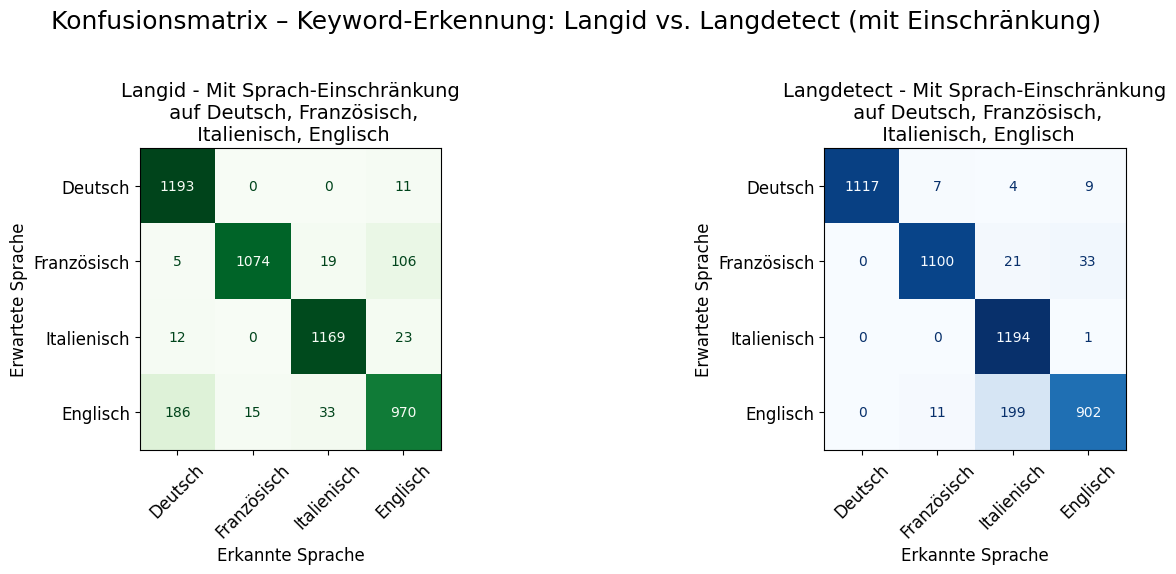

Langid (mit Einschränkung) Genauigkeit:     91.49 %
Langdetect (mit Einschränkung) Genauigkeit: 89.56 %

🔍 Stichwörter, die Englisch sein sollten, aber als Deutsch erkannt wurden (langid):



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import langid
from langdetect import detect_langs

# === Sprach-Mapping ===
languages = {'DE': 'Deutsch', 'FR': 'Französisch', 'IT': 'Italienisch', 'EN': 'Englisch'}
iso_to_de = {'en': 'Englisch', 'fr': 'Französisch', 'de': 'Deutsch', 'it': 'Italienisch'}


# === Sprachfunktionen ===
langid.set_languages(['en', 'fr', 'de', 'it'])

def detect_langid_constrained(text):
    try:
        lang, _ = langid.classify(str(text))
        return iso_to_de.get(lang, 'nicht_erkannt')
    except:
        return 'nicht_erkannt'

def detect_langdetect_constrained(text):
    try:
        langs = detect_langs(str(text))
        for lang in langs:
            if lang.lang in ['de', 'fr', 'it', 'en']:
                return iso_to_de.get(lang.lang, 'nicht_erkannt')
        return 'nicht_erkannt'
    except:
        return 'nicht_erkannt'

# === Daten einlesen ===
df = pd.read_csv(data_path, encoding="utf-8")

# === Spaltenzuordnung ===
base_columns = ['dataset_keyword']
column_lang_mapping = {
    f"{base}_{lang}": expected_lang
    for base in base_columns
    for lang, expected_lang in languages.items()
    if f"{base}_{lang}" in df.columns
}

# === Spracherkennung anwenden ===
for col, expected_lang in column_lang_mapping.items():
    df[f"{col}_langid_c"] = df[col].apply(detect_langid_constrained)
    df[f"{col}_langdetect_c"] = df[col].apply(detect_langdetect_constrained)

# === Ergebnisse sammeln ===
expected = []
detected_langid_c = []
detected_langdetect_c = []

for col, lang in column_lang_mapping.items():
    expected += [lang] * len(df)
    detected_langid_c += df[f"{col}_langid_c"].tolist()
    detected_langdetect_c += df[f"{col}_langdetect_c"].tolist()

# === Gültige Einträge filtern ===
def filter_valid(e, d):
    return zip(*[(ex, de) for ex, de in zip(e, d) if de != 'nicht_erkannt'])

expected_langid_c, detected_langid_c_f = filter_valid(expected, detected_langid_c)
expected_langdetect_c, detected_langdetect_c_f = filter_valid(expected, detected_langdetect_c)

# === Konfusionsmatrizen ===
labels = ['Deutsch', 'Französisch', 'Italienisch', 'Englisch']
cm_langid = confusion_matrix(expected_langid_c, detected_langid_c_f, labels=labels)
cm_langdetect = confusion_matrix(expected_langdetect_c, detected_langdetect_c_f, labels=labels)

# === Visualisierung (nebeneinander) ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Langid
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_langid, display_labels=labels)
disp1.plot(ax=axes[0], cmap='Greens', xticks_rotation=45, colorbar=False)
axes[0].set_title("Langid - Mit Sprach-Einschränkung\n auf Deutsch, Französisch,\n Italienisch, Englisch", fontsize=subtitle_size)
axes[0].set_xlabel("Erkannte Sprache", fontsize=axis_title_size)
axes[0].set_ylabel("Erwartete Sprache", fontsize=axis_title_size)
axes[0].tick_params(axis='both', labelsize=axis_title_label_size)

# Langdetect
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_langdetect, display_labels=labels)
disp2.plot(ax=axes[1], cmap='Blues', xticks_rotation=45, colorbar=False)
axes[1].set_title("Langdetect - Mit Sprach-Einschränkung\n auf Deutsch, Französisch,\n Italienisch, Englisch", fontsize=subtitle_size)
axes[1].set_xlabel("Erkannte Sprache", fontsize=axis_title_size)
axes[1].set_ylabel("Erwartete Sprache", fontsize=axis_title_size)
axes[1].tick_params(axis='both', labelsize=axis_title_label_size)

plt.suptitle("Konfusionsmatrix – Keyword-Erkennung: Langid vs. Langdetect (mit Einschränkung)", fontsize=title_size)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# === Genauigkeit berechnen ===
acc_langid = (sum(e == d for e, d in zip(expected, detected_langid_c)) / len(expected)) * 100
acc_langdetect = (sum(e == d for e, d in zip(expected, detected_langdetect_c)) / len(expected)) * 100

print(f"Langid (mit Einschränkung) Genauigkeit:     {acc_langid:.2f} %")
print(f"Langdetect (mit Einschränkung) Genauigkeit: {acc_langdetect:.2f} %")

# === 10 englische Keywords, die fälschlich als Deutsch erkannt wurden ===
print("\n🔍 Stichwörter, die Englisch sein sollten, aber als Deutsch erkannt wurden (langid):\n")





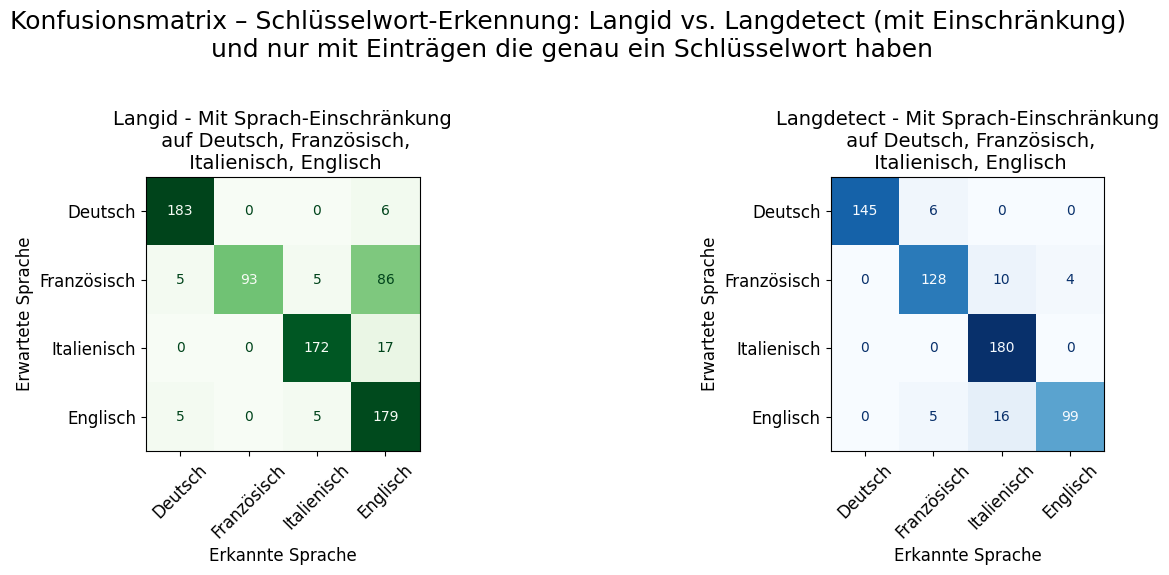

Langid (mit Einschränkung) Genauigkeit:     82.94 %
Langdetect (mit Einschränkung) Genauigkeit: 73.02 %

🔍 Stichwörter, die Englisch sein sollten, aber als Deutsch erkannt wurden (langid):



In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import langid
from langdetect import detect_langs

# === Sprach-Mapping ===
languages = {'DE': 'Deutsch', 'FR': 'Französisch', 'IT': 'Italienisch', 'EN': 'Englisch'}
iso_to_de = {'en': 'Englisch', 'fr': 'Französisch', 'de': 'Deutsch', 'it': 'Italienisch'}


# === Sprachfunktionen ===
langid.set_languages(['en', 'fr', 'de', 'it'])

def detect_langid_constrained(text):
    try:
        lang, _ = langid.classify(str(text))
        return iso_to_de.get(lang, 'nicht_erkannt')
    except:
        return 'nicht_erkannt'

def detect_langdetect_constrained(text):
    try:
        langs = detect_langs(str(text))
        for lang in langs:
            if lang.lang in ['de', 'fr', 'it', 'en']:
                return iso_to_de.get(lang.lang, 'nicht_erkannt')
        return 'nicht_erkannt'
    except:
        return 'nicht_erkannt'

# === Daten einlesen ===
df = pd.read_csv(data_path, encoding="utf-8")

# === Spaltenzuordnung ===
base_columns = ['dataset_keyword']
column_lang_mapping = {
    f"{base}_{lang}": expected_lang
    for base in base_columns
    for lang, expected_lang in languages.items()
    if f"{base}_{lang}" in df.columns
}

from ast import literal_eval

# Filtere die DataFrame-Zeilen: nur Zeilen mit genau einem Keyword
for col in column_lang_mapping.keys():
    df[col + '_valid'] = df[col].apply(lambda x: isinstance(x, str) and len(literal_eval(x)) == 1 if pd.notnull(x) else False)

# Nur gültige Zeilen behalten
valid_mask = df[[col + '_valid' for col in column_lang_mapping.keys()]].any(axis=1)
df = df[valid_mask].reset_index(drop=True)


# === Spracherkennung anwenden ===
for col, expected_lang in column_lang_mapping.items():
    df[f"{col}_langid_c"] = df[col].apply(detect_langid_constrained)
    df[f"{col}_langdetect_c"] = df[col].apply(detect_langdetect_constrained)

# === Ergebnisse sammeln ===
expected = []
detected_langid_c = []
detected_langdetect_c = []

for col, lang in column_lang_mapping.items():
    expected += [lang] * len(df)
    detected_langid_c += df[f"{col}_langid_c"].tolist()
    detected_langdetect_c += df[f"{col}_langdetect_c"].tolist()

# === Gültige Einträge filtern ===
def filter_valid(e, d):
    return zip(*[(ex, de) for ex, de in zip(e, d) if de != 'nicht_erkannt'])

expected_langid_c, detected_langid_c_f = filter_valid(expected, detected_langid_c)
expected_langdetect_c, detected_langdetect_c_f = filter_valid(expected, detected_langdetect_c)

# === Konfusionsmatrizen ===
labels = ['Deutsch', 'Französisch', 'Italienisch', 'Englisch']
cm_langid = confusion_matrix(expected_langid_c, detected_langid_c_f, labels=labels)
cm_langdetect = confusion_matrix(expected_langdetect_c, detected_langdetect_c_f, labels=labels)

# === Visualisierung (nebeneinander) ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Langid
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_langid, display_labels=labels)
disp1.plot(ax=axes[0], cmap='Greens', xticks_rotation=45, colorbar=False)
axes[0].set_title("Langid - Mit Sprach-Einschränkung\n auf Deutsch, Französisch,\n Italienisch, Englisch", fontsize=subtitle_size)
axes[0].set_xlabel("Erkannte Sprache", fontsize=axis_title_size)
axes[0].set_ylabel("Erwartete Sprache", fontsize=axis_title_size)
axes[0].tick_params(axis='both', labelsize=axis_title_label_size)

# Langdetect
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_langdetect, display_labels=labels)
disp2.plot(ax=axes[1], cmap='Blues', xticks_rotation=45, colorbar=False)
axes[1].set_title("Langdetect - Mit Sprach-Einschränkung\n auf Deutsch, Französisch,\n Italienisch, Englisch", fontsize=subtitle_size)
axes[1].set_xlabel("Erkannte Sprache", fontsize=axis_title_size)
axes[1].set_ylabel("Erwartete Sprache", fontsize=axis_title_size)
axes[1].tick_params(axis='both', labelsize=axis_title_label_size)

plt.suptitle("Konfusionsmatrix – Schlüsselwort-Erkennung: Langid vs. Langdetect (mit Einschränkung)\n und nur mit Einträgen die genau ein Schlüsselwort haben", fontsize=title_size)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# === Genauigkeit berechnen ===
acc_langid = (sum(e == d for e, d in zip(expected, detected_langid_c)) / len(expected)) * 100
acc_langdetect = (sum(e == d for e, d in zip(expected, detected_langdetect_c)) / len(expected)) * 100

print(f"Langid (mit Einschränkung) Genauigkeit:     {acc_langid:.2f} %")
print(f"Langdetect (mit Einschränkung) Genauigkeit: {acc_langdetect:.2f} %")

# === 10 englische Keywords, die fälschlich als Deutsch erkannt wurden ===
print("\n🔍 Stichwörter, die Englisch sein sollten, aber als Deutsch erkannt wurden (langid):\n")



